## Project Name: Diabetes Patients


Author: Joshua Kabwanga

### Introduction

This notebook explores patients from the National Institute of Diabetes, Digestive and Kidney Diseases.

### Abount the Analysis

The primary goal of this analysis is to provide insight based on the patient information that's been provided in the dataset and predict whether a patient has diabetes based on certain diagnostic measurements included in the project.
Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are female, with only one dependent variable (outcome).


##### Dataset


The diabetes dataset contains detailed information about all the patients, such as age, pregnancy, glucose, blood pressure, skin thickness, insulin, and BMI.
The dataset is a CSV file that contains 768 rows and 9 columns.


##### Steps taken
The first step we took was to understand the structure of the data and identify specific research questions that we wanted to explore using the dataset. We imported the necessary libraries and loaded the dataset into Python.

This is followed by data cleaning by checking missing values, checking duplicated values, and checking data types. and replace the **0 value** in the BMI, blood pressure, insulin, skin thickness, and glucose column with the mean value. because it's doesn't make up to have **0 value** in the above dolumn.

After I impliment statatistic and Data engeering techniques to normalize the data before Machine learning proceess




#Load packages

In [898]:

import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline


from scipy.stats import boxcox
from scipy.stats.mstats import normaltest

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error



from sklearn.pipeline import Pipeline



In [899]:
#Read the dataset

df = pd.read_csv("diabetes.csv")


**Getting to know the dataset**

The first 5 rows of the dataset

In [900]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


The Last 5 rows of the dataset

In [901]:
df.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


The function `shape` returns the shape of an array. The shape is a tuple of integers. These numbers denote the lengths of the corresponding array dimension. so in this dataset we have 768 rows and 9 colomns.

In [902]:
#dimension of the dataset
df.shape

(768, 9)

In [903]:
#Check the number of null value in the dataset
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [904]:
#Quantity value of duplicate
df.duplicated().sum()

0

In [905]:
#data type check function
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Let's go trough Data expoloratory analysis to gain more insight about about the dataset

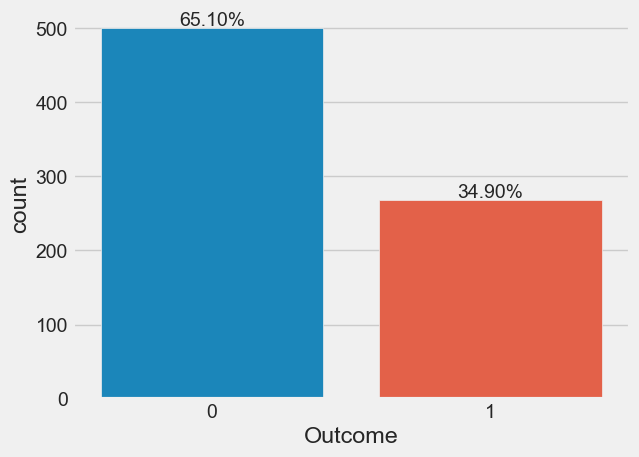

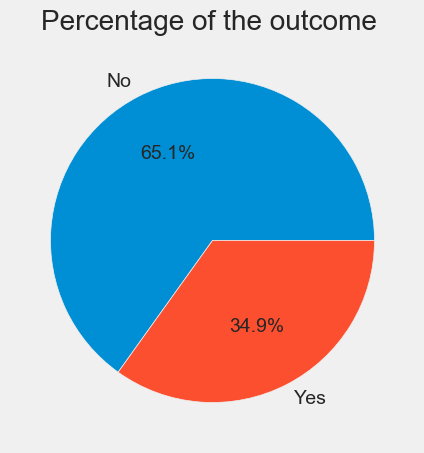

In [906]:
s = sns.countplot(x = 'Outcome',data = df)
sizes=[]
for p in s.patches:
    height = p.get_height()
    sizes.append(height)
    s.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(df)*100),
            ha="center", fontsize=14) 
    
#Pie chart that calculate the % of the outcome column
labels=['No','Yes']

df1 = df['Outcome'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(df1, labels=labels, autopct='%1.1f%%')
plt.title('Percentage of the outcome ')
plt.show()

Here:

    No: 65.1% Don't have diabetes.

    Yes: 34.9% Diabetes positive.

Note:The are 34.9% people has been dagnosed with diabetes and 65.1% of people that are negative result from diabetes

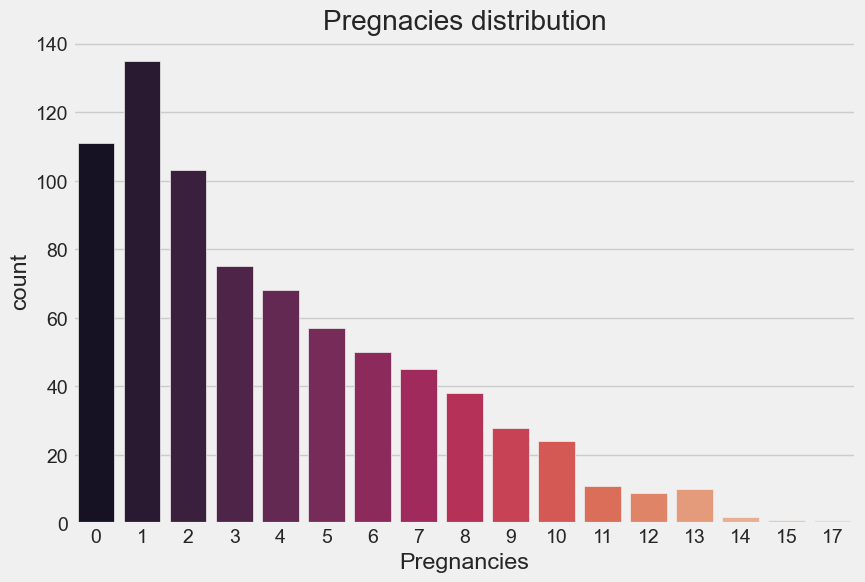

In [907]:
#Pregnancies colunm distributions 

plt.figure(figsize=(9,6))
sns.countplot(x='Pregnancies', data = df, palette="rocket")
plt.title("Pregnacies distribution")
plt.show()

The above bar chart explains the distributions of the number of femeles pregnancies that have occured in the above dataset.

This describes that the woman with 1 pregnancy  counts 135 cases in  the dataset, after women that never been pregnant with 111 counts, after 2 cases with 103 counts and more, last we have 1 count with 17 cases of pregnancies

In [908]:
#statistic descriptive
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Insight

We can see there few data for columns Glucose , Insulin, skin thickenss, BMI and Blood Pressure which have value as 0. That's not possible,right? you can do a quick search to see that one cannot have 0 values for these. Let's deal with that. we can either remove such data or simply replace it with their respective mean values. Let's do the latter.

### Looking for Correlations

Before proceeding with the data cleaning, it is useful to establish a correlation between the response variable (in our case the Outcome ) and other predictor variables, as some of them might not have any major impact in determining the total sale and will not be used in the analysis. There are many ways to discover correlation between the target variable and the rest of the features. Building pair plots, scatter plots, heat maps, and a correlation matrixes are the most common ones. Below, we will use the corr() function to list the top features based on the pearson correlation coefficient (measures how closely two sequences of numbers are correlated). Correlation coefficient can only be calculated on the numerical attributes (floats and integers), therefore, only the numeric attributes will be selected.

In [909]:
#check for correlated columns
corr_matrix = df.corr(numeric_only=True)

corr_matrix['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

In [910]:
#here few misconception is there like BMI can not be zero, Bloid Pressure can't be also zero, glucose, insuline can't be zero so lets try to fix it
# now replacing zero with the mean values of the following columns

df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())

In [911]:
#Double check
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.000000,3.000000,6.00000,17.00
Glucose,768.0,121.681605,30.436016,44.000,99.750000,117.000000,140.25000,199.00
BloodPressure,768.0,72.254807,12.115932,24.000,64.000000,72.000000,80.00000,122.00
SkinThickness,768.0,26.606479,9.631241,7.000,20.536458,23.000000,32.00000,99.00
Insulin,768.0,118.660163,93.080358,14.000,79.799479,79.799479,127.25000,846.00
BMI,768.0,32.450805,6.875374,18.200,27.500000,32.000000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.243750,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.000000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000000,0.000000,1.00000,1.00


Result

There are 768 records in the dataset.

Well done but the zero value from the columns Glucose, Insulin, skin thickness, BMI and Blood Pressure will be replace with the mean values. since it's impossible to have zero value from the above columns.

In [912]:
#drop Diabetes pedigree function column

df.drop(['DiabetesPedigreeFunction'], axis=1, inplace=True)

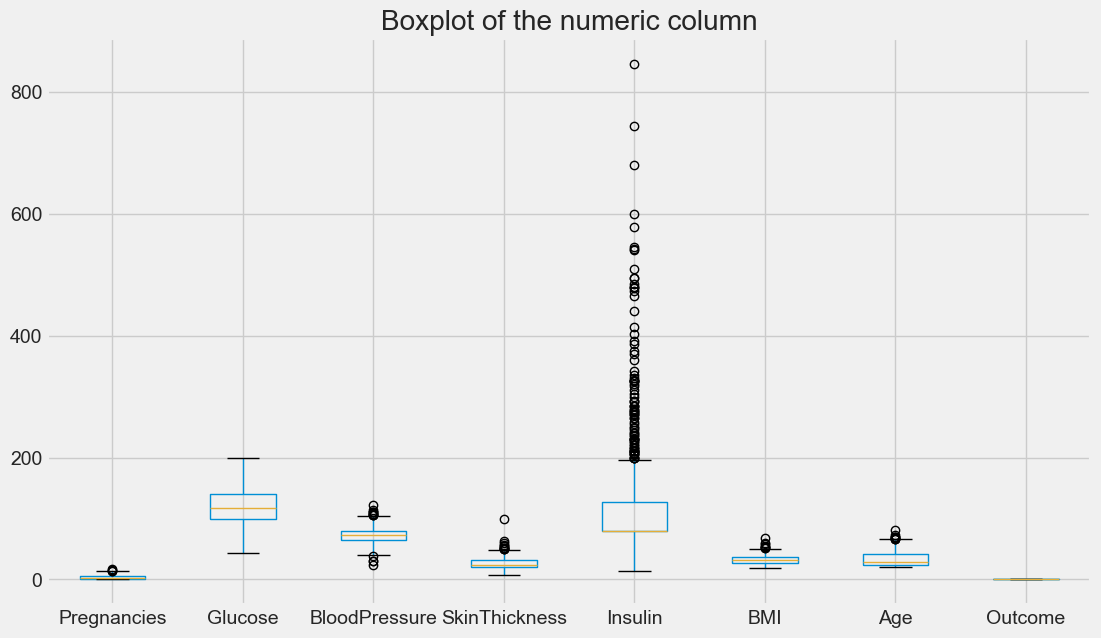

In [913]:
plt.figure(figsize=(12,7))
df.boxplot()
plt.title("Boxplot of the numeric column")
plt.show()

**A quick view of what insulin is and functions in the body**


[***Insulin***](https://https://kidshealth.org/en/parents/insulin.html#:~:text=Insulin%20is%20a%20hormone%20that,or%20stored%20for%20future%20use.) is a hormone that lowers the level of glucose (a type of sugar) in the blood. It's made by the beta cells of the pancreas and released into the blood when the glucose level goes up, such as after eating. Insulin helps glucose enter the body's cells, where it can be used for energy or stored for future use

I will leave the outliers as it's,   Maybe there are some explanations why it's there.


# Histogram distribution of numeric column

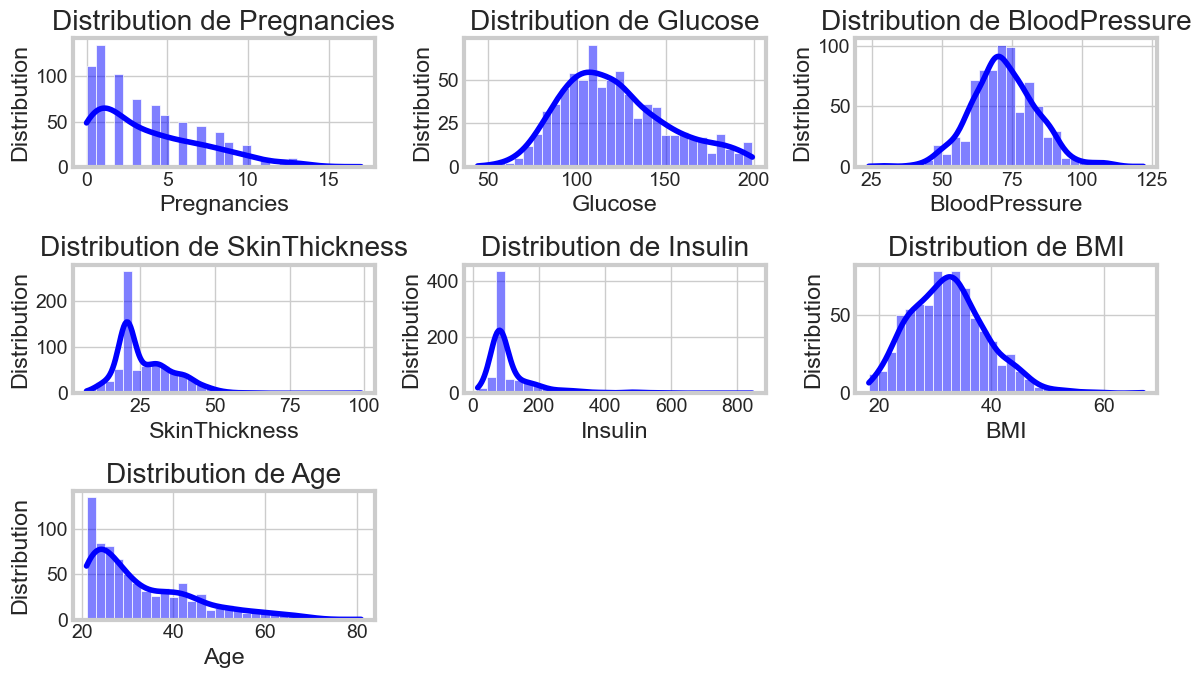

In [914]:
sns.set_style("whitegrid")

plt.figure(figsize=(12,7))
for i, column in enumerate(df.columns[:-1],1):
    plt.subplot(3,3,i)
    sns.histplot(df[column], bins=30, kde=True , color="blue")
    plt.title(f'Distribution de {column}')
    plt.xlabel(column)
    plt.ylabel('Distribution')

plt.tight_layout()
plt.show()

### Log Transformation

We can also check statistically if the target is normally distributed, using `normaltest()` function. If the p-value is large (>0.05), the target variable is normally distributed.

Nomalize the data per column

### 3. Normality
The linear regression analysis requires the dependent variable, to be normally distributed. A histogram, box plot, or a Q-Q-Plot can check if the target variable is normally distributed. The goodness of fit test, e.g., the Kolmogorov-Smirnov test can check for normality in the dependent variable. [This documentation](https://towardsdatascience.com/normality-tests-in-python-31e04aa4f411) contains more information on the normality assumption. 

Let's display all three charts to show how our target variable,  behaves.


C:\Users\A-Type\AppData\Local\Temp\ipykernel_10688\722292140.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.loc[:,feature], norm_hist=True, ax = ax1)


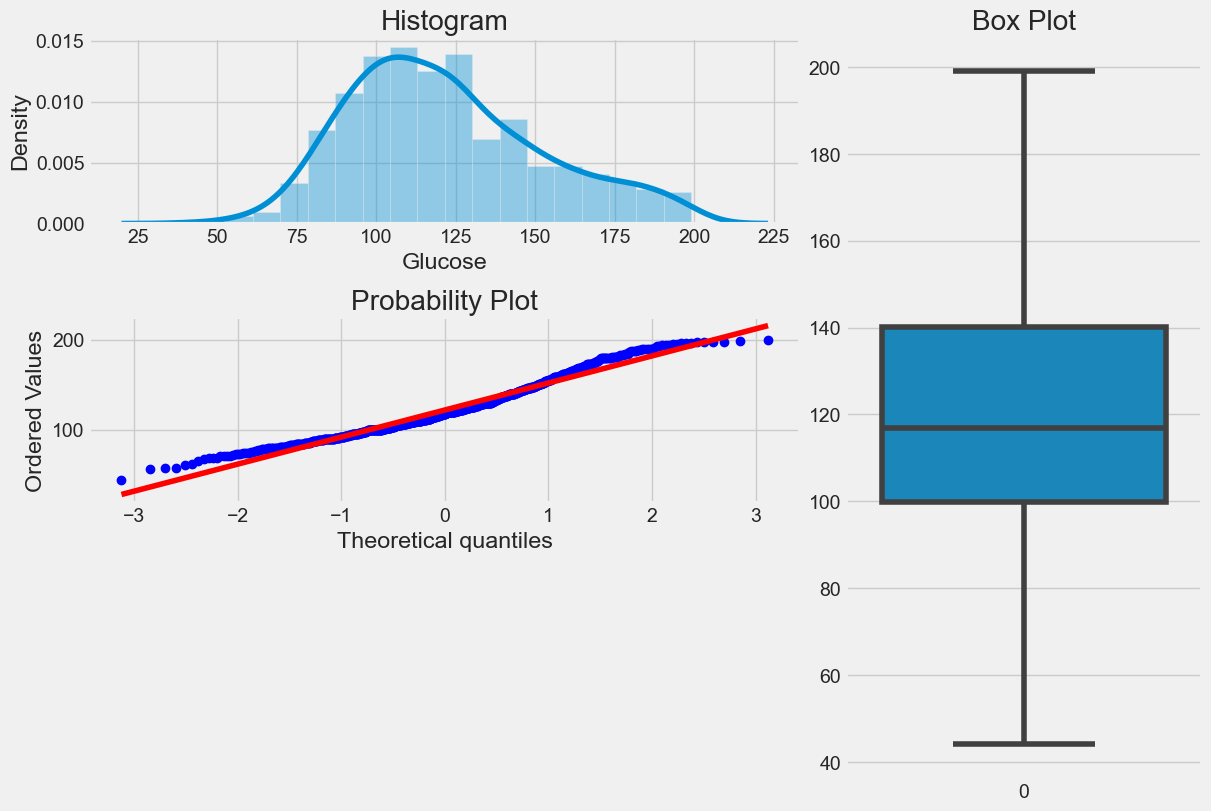

In [915]:
def plotting_3_chart(data, feature):
    ## Importing seaborn, matplotlab and scipy modules. 
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    from scipy import stats
    import matplotlib.style as style
    style.use('fivethirtyeight')

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(12,8))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(data.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(data.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(data.loc[:,feature], orient='v', ax = ax3);
    
plotting_3_chart(df, 'Glucose')

In [916]:
normaltest(df.Glucose.values)

NormaltestResult(statistic=35.37277779478811, pvalue=2.084005674046153e-08)

In [917]:
#Nomalize the data per column
df['Glucose'] = df['Glucose'].apply(np.log1p)
df['BMI'] = df['BMI'].apply(np.log1p)
df['Insulin'] = df['Insulin'].apply(np.log1p)
df['SkinThickness'] = df['SkinThickness'].apply(np.log1p)
df['BloodPressure'] = df['BloodPressure'].apply(np.log1p)


Histogram distribution

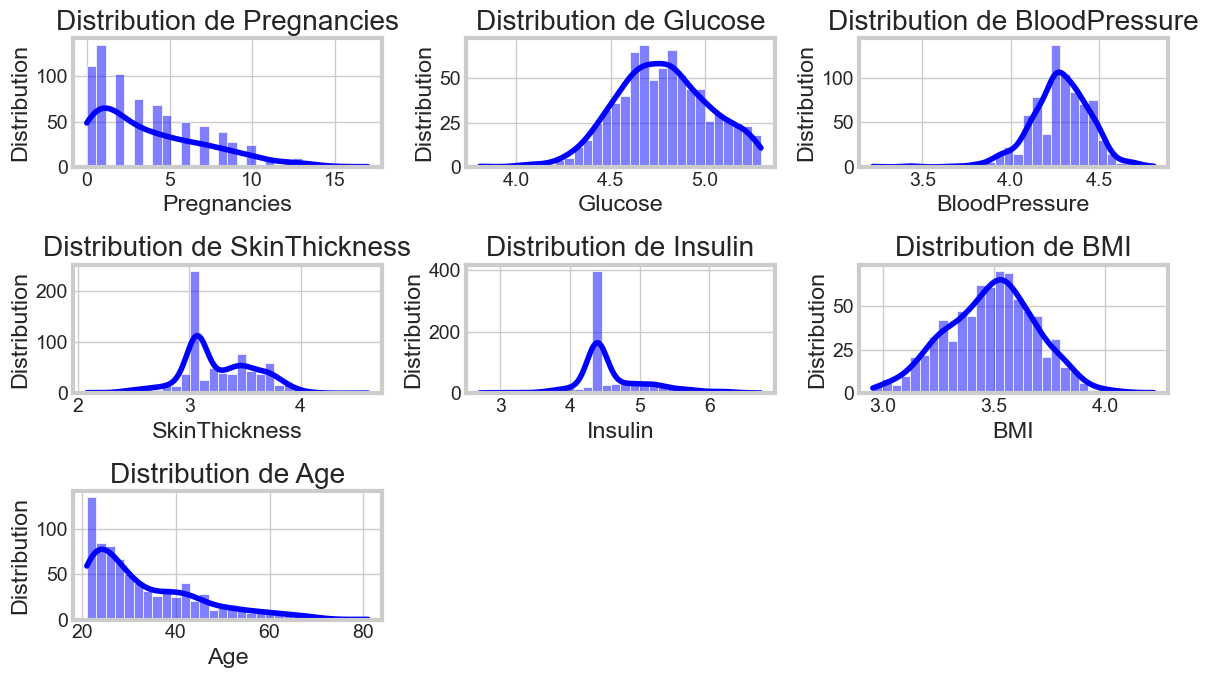

In [918]:
sns.set_style("whitegrid")

plt.figure(figsize=(12,7))
for i, column in enumerate(df.columns[:-1],1):
    plt.subplot(3,3,i)
    sns.histplot(df[column], bins=30, kde=True , color="blue")
    plt.title(f'Distribution de {column}')
    plt.xlabel(column)
    plt.ylabel('Distribution')

plt.tight_layout()
plt.show()

In [919]:
normaltest(df.Glucose.values)

NormaltestResult(statistic=1.417288098837868, pvalue=0.49231129486953895)

As we can see, the p-value is very small, so it is not normally distributed.

Now, we can try to transform our data, so it looks more normally distributed. We can use the `np.log()` or `np.log1p`functions from the `numpy` library to perform the log transformation. The `np.log1p` works better with smaller numbers and thus provides more accurate results. This [documentation](https://numpy.org/doc/stable/reference/generated/numpy.log.html) contains more information about the numpy log transform.


C:\Users\A-Type\AppData\Local\Temp\ipykernel_10688\722292140.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.loc[:,feature], norm_hist=True, ax = ax1)


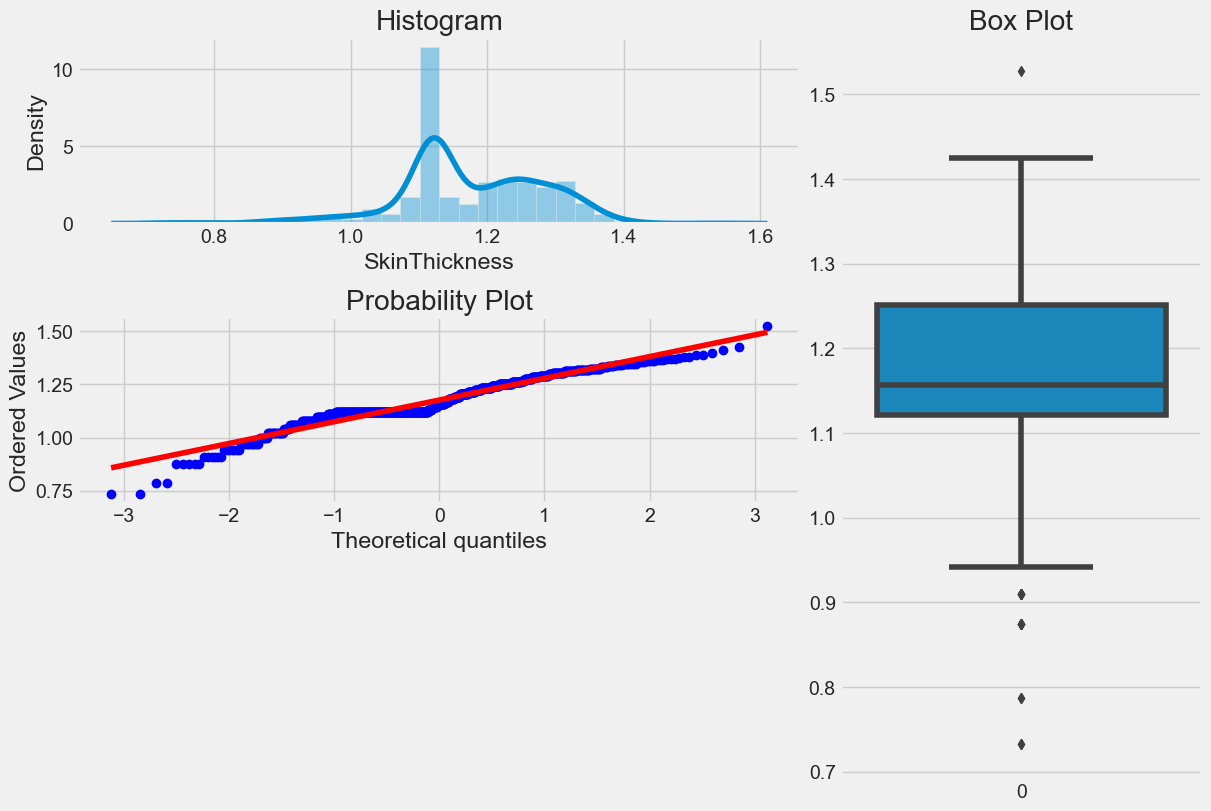

In [920]:
df['Glucose'] = np.log(df['Glucose'])
df['BMI'] = np.log(df['BMI'])
df['SkinThickness'] = np.log(df['SkinThickness'])
df['Insulin'] = np.log(df['Insulin'])
df['BloodPressure'] = np.log(df['BloodPressure'])

plotting_3_chart(df, 'SkinThickness')


In [921]:
normaltest(df.Glucose.values)

NormaltestResult(statistic=5.884276466754085, pvalue=0.05275281023873507)

We can see from the above resul the data has been normally distributed

### pairplot

Linear regression needs the relationship between independent variable and the dependent variable to be linear. We can test this assumption with some scatter plots and regression lines. 

We will start with the 'enginesize' and 'horsepower' features.


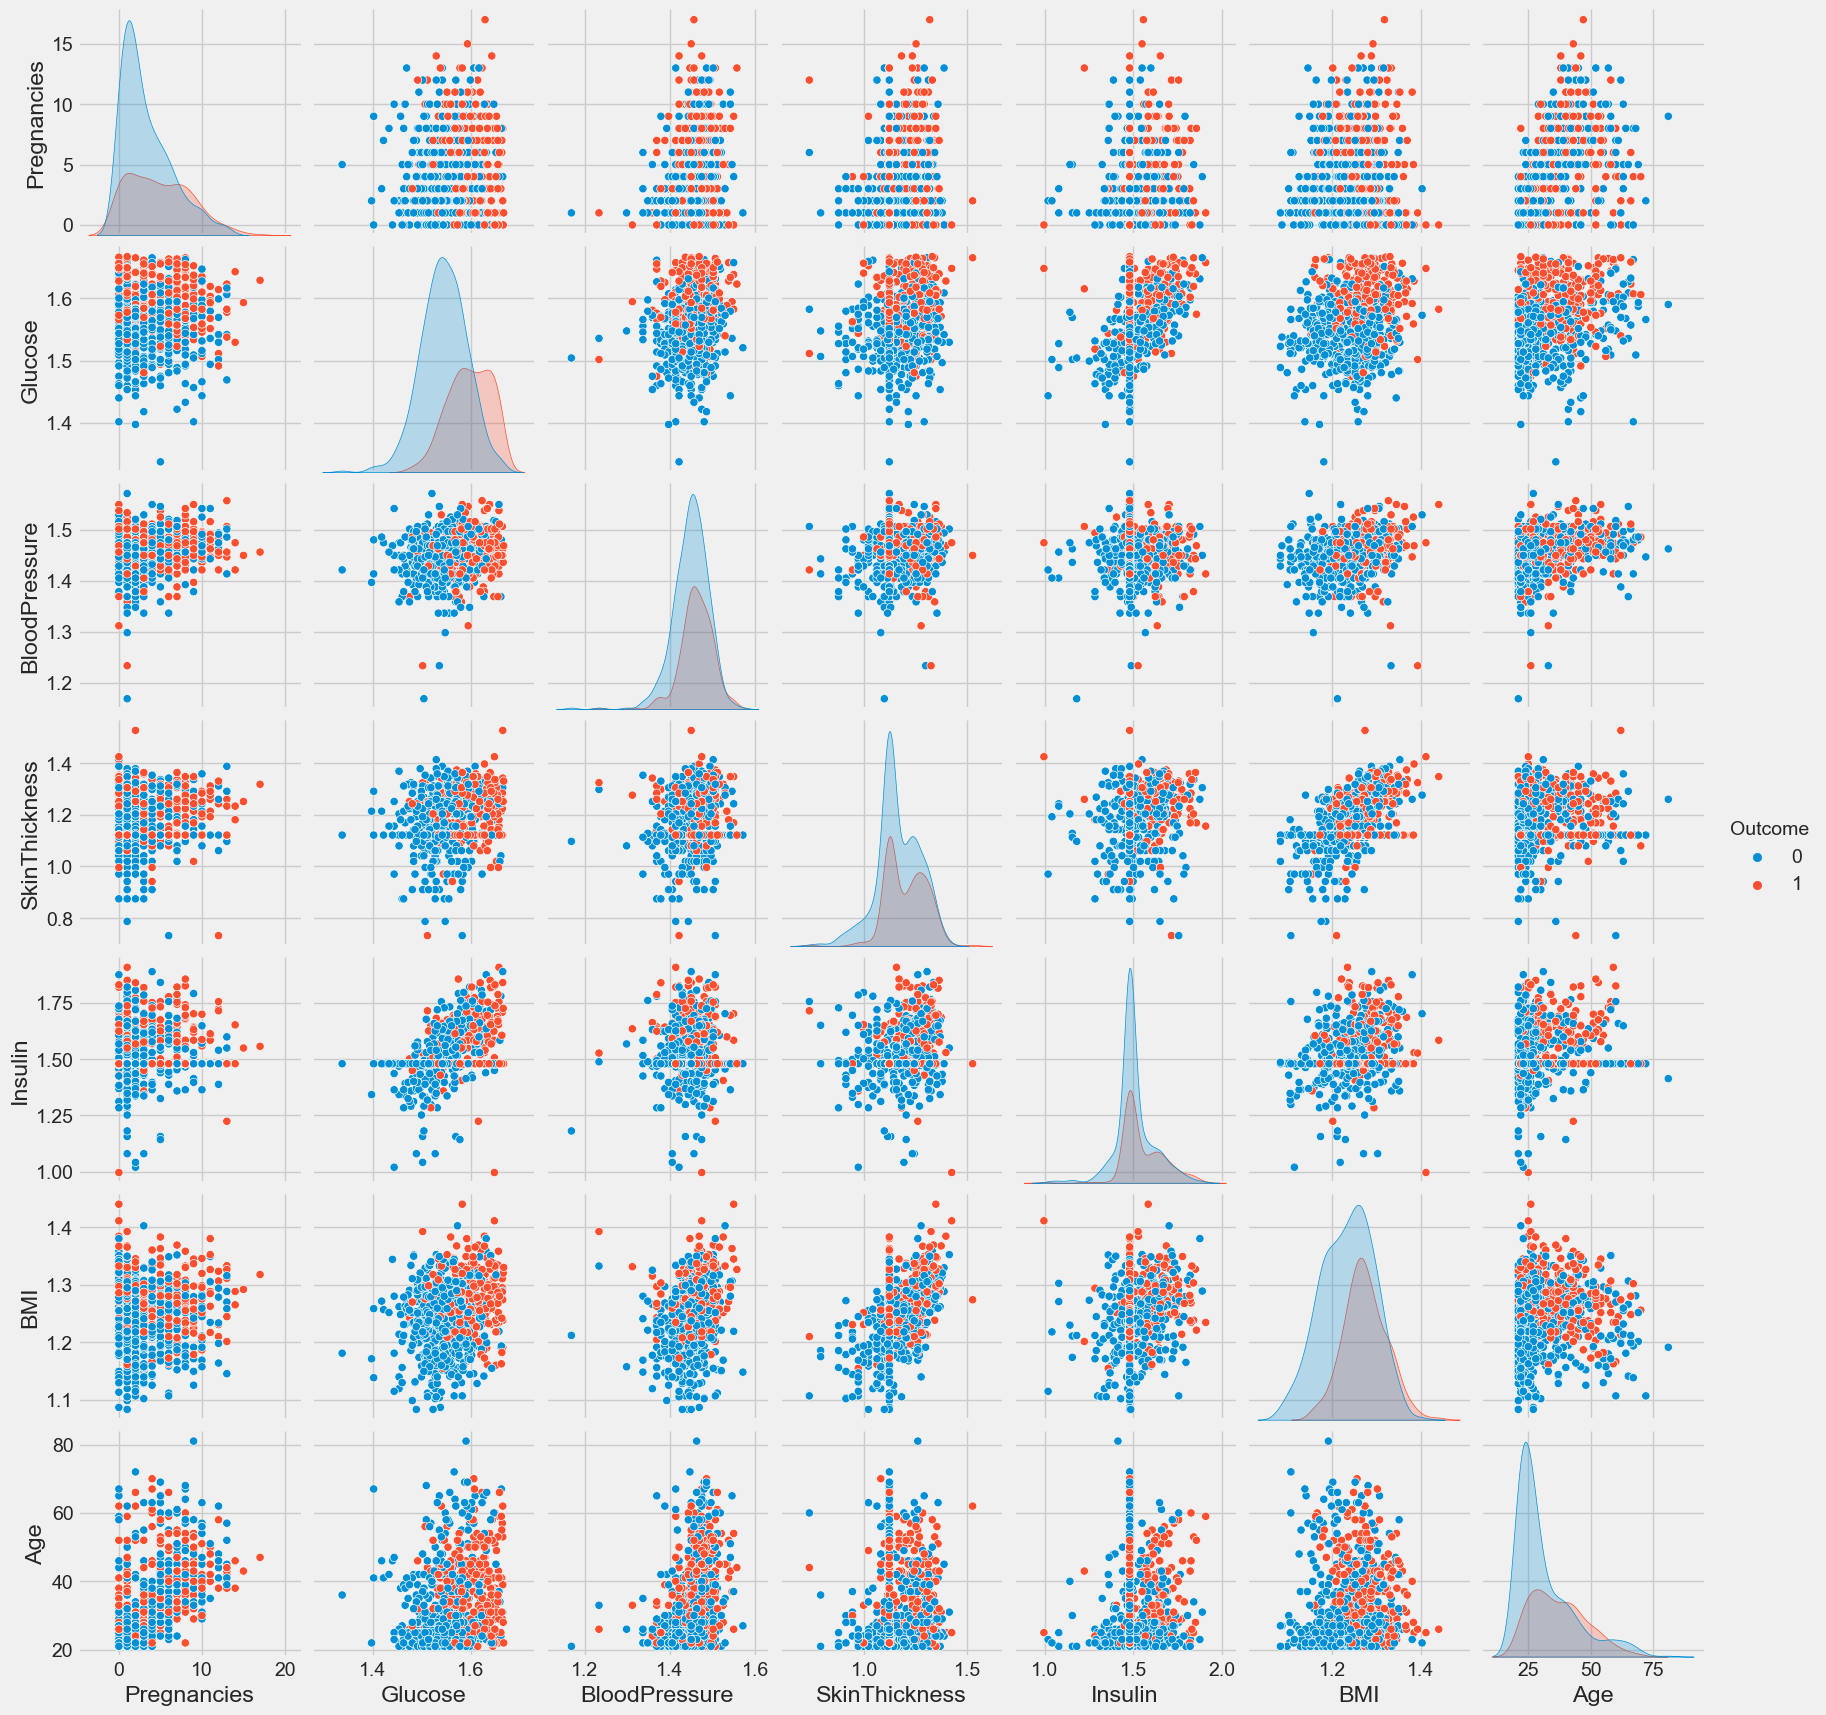

In [922]:
sns.pairplot(df, hue='Outcome')

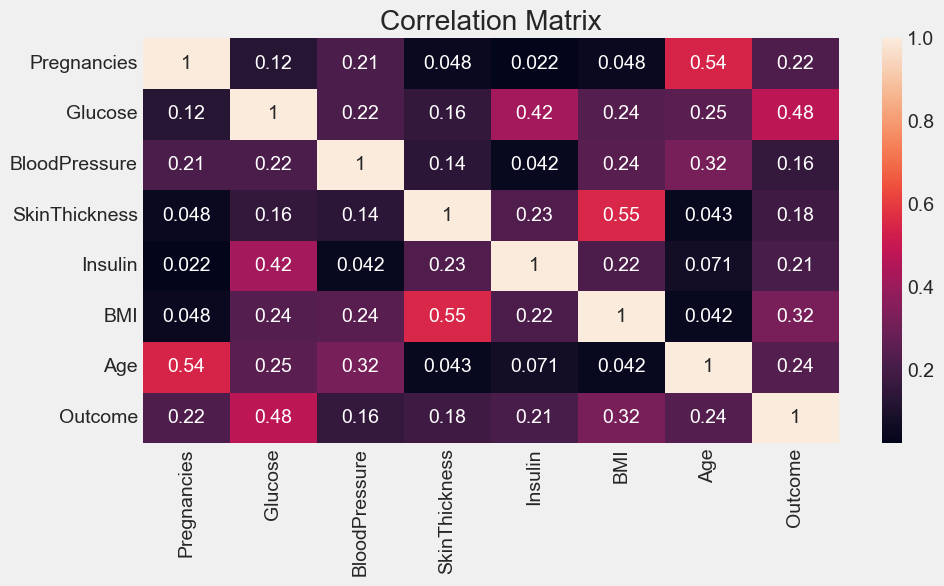

In [923]:
#Correlation coefficiant

plt.figure(figsize=(10,5))
data= df.corr()
sns.heatmap(data, annot=True)
plt.title("Correlation Matrix")
plt.show()


Result

* Outcome has a moderate positive correlation with Glucose, which makes sense as glucose levels are a direct indicator of diabetes.

* Age and pregnancies are positively correlated. this is expected since as age increases, the number of pregnancies for a woman can also increase.

* Skin Thickness and BMI are positively correlated. A higher Body mass index might be associated with thicker skin.






# **ML model**

In [924]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

In [925]:
# Features and target
X = df.drop(columns=['Outcome'])
y = df['Outcome']


In [926]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [927]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
predictions=dtc.predict(X_test)

In [928]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
0,6,1.610227,1.456394,1.276345,1.479778,1.265215,50
1,1,1.493881,1.436201,1.224128,1.479778,1.199307,31
2,8,1.651527,1.428968,1.121595,1.479778,1.160170,32
3,1,1.504035,1.436201,1.156269,1.515979,1.215132,21
4,0,1.594782,1.311994,1.276345,1.635086,1.331431,33
...,...,...,...,...,...,...,...
763,10,1.531470,1.468751,1.358877,1.648370,1.259431,63
764,2,1.571151,1.449898,1.203634,1.479778,1.289869,27
765,5,1.569453,1.456394,1.156269,1.553373,1.194897,30
766,1,1.577779,1.413636,1.121595,1.479778,1.234659,47


**Result**

In [929]:
print("Accuracy Score :",accuracy_score(y_test,predictions))
print("Classification Report \n",classification_report(y_test,predictions))

Accuracy Score : 0.7359307359307359
Classification Report 
               precision    recall  f1-score   support

           0       0.79      0.83      0.81       157
           1       0.60      0.54      0.57        74

    accuracy                           0.74       231
   macro avg       0.69      0.68      0.69       231
weighted avg       0.73      0.74      0.73       231



# Print the plot

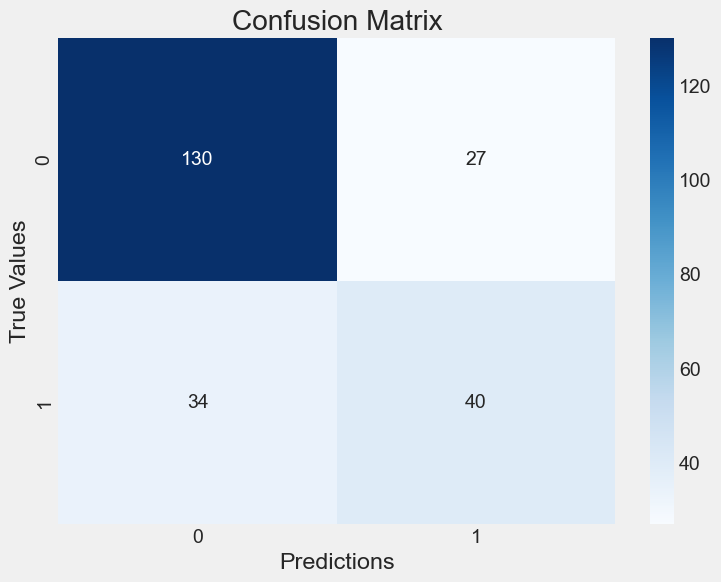

In [930]:
cm = confusion_matrix(y_test,predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.title('Confusion Matrix')
plt.show()

In [931]:
from sklearn.metrics import r2_score 
r2_score(y_test,predictions)

-0.21285935617145801

# **2 Model ML**



In [932]:
from catboost import CatBoostClassifier


X =  df.drop(['Outcome'], axis=1)
y = df['Outcome']

In [933]:

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [934]:

def evaluate_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    precision, recall, f1, _ = precision_recall_fscore_support(true, predicted, average='weighted')
    return accuracy, precision, recall, f1

In [935]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier()
}

model_list = []
accuracy_list = []

for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train the model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_accuracy, model_train_precision, model_train_recall, model_train_f1 = evaluate_model(y_train, y_train_pred)
    model_test_accuracy, model_test_precision, model_test_recall, model_test_f1 = evaluate_model(y_test, y_test_pred)

    print(model_name)
    model_list.append(model_name)

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- F1 Score: {:.4f}".format(model_train_f1))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- F1 Score: {:.4f}".format(model_test_f1))

    print('='*35)
    print('\n')

Logistic Regression
Model performance for Training set
- Accuracy: 0.6872
- Precision: 0.6734
- Recall: 0.6872
- F1 Score: 0.6619
----------------------------------
Model performance for Test set
- Accuracy: 0.7273
- Precision: 0.7116
- Recall: 0.7273
- F1 Score: 0.6987


Support Vector Machine
Model performance for Training set
- Accuracy: 0.6778
- Precision: 0.6662
- Recall: 0.6778
- F1 Score: 0.6679
----------------------------------
Model performance for Test set
- Accuracy: 0.6494
- Precision: 0.6383
- Recall: 0.6494
- F1 Score: 0.6429


CatBoosting Classifier
Model performance for Training set
- Accuracy: 0.9404
- Precision: 0.9411
- Recall: 0.9404
- F1 Score: 0.9398
----------------------------------
Model performance for Test set
- Accuracy: 0.7619
- Precision: 0.7526
- Recall: 0.7619
- F1 Score: 0.7526




c:\Users\A-Type\AppData\Local\R-MINI~1\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Classifier
Model performance for Training set
- Accuracy: 0.8287
- Precision: 0.8267
- Recall: 0.8287
- F1 Score: 0.8264
----------------------------------
Model performance for Test set
- Accuracy: 0.7359
- Precision: 0.7226
- Recall: 0.7359
- F1 Score: 0.7224




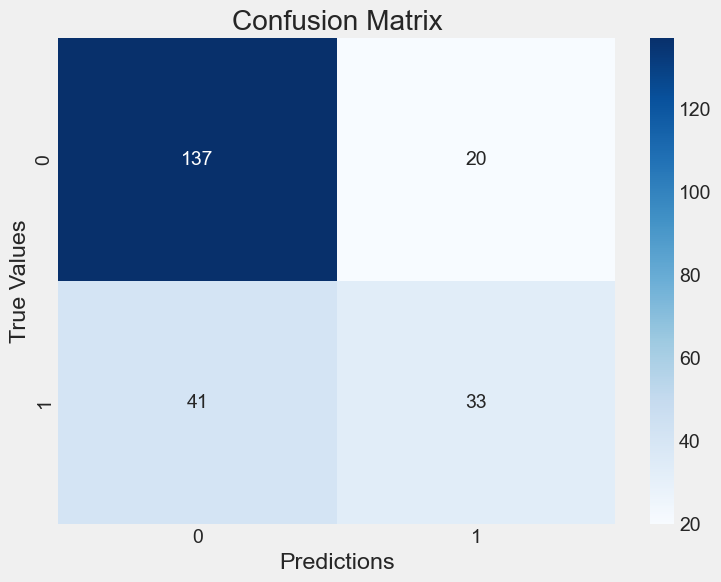

In [936]:
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.title('Confusion Matrix')
plt.show()

In [937]:
mse = mean_squared_error(y_test, y_test_pred)
mse

0.26406926406926406

In [938]:
 #Random Forest Model

from imblearn.over_sampling import SMOTE
oversampler = SMOTE(random_state=0)
smote_train , smote_target = oversampler.fit_resample(X_train,y_train)
from sklearn.ensemble import RandomForestClassifier
     

x_train , x_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=42)
rfc = RandomForestClassifier()
rfc = rfc.fit(smote_train,smote_target)
y_pred_rf = rfc.predict(x_test)

print('accuracy',metrics.accuracy_score(y_test,y_pred_rf))

accuracy 0.935064935064935


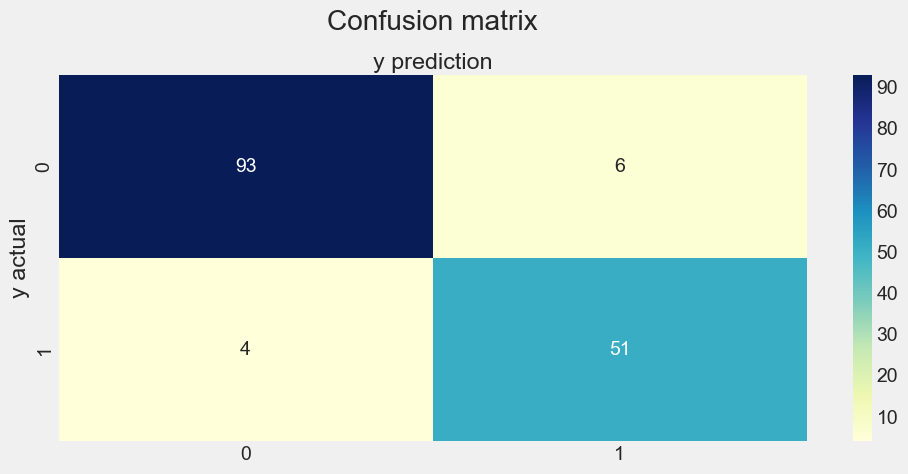

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        99
           1       0.89      0.93      0.91        55

    accuracy                           0.94       154
   macro avg       0.93      0.93      0.93       154
weighted avg       0.94      0.94      0.94       154



In [939]:
fig, ax = plt.subplots(figsize=(10,5))
cm = metrics.confusion_matrix(y_test,y_pred_rf)
sns.heatmap(cm,annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.xlabel('y prediction')
plt.ylabel('y actual')
plt.show()

print(metrics.classification_report(y_test, y_pred_rf))